In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.stattools import adfuller

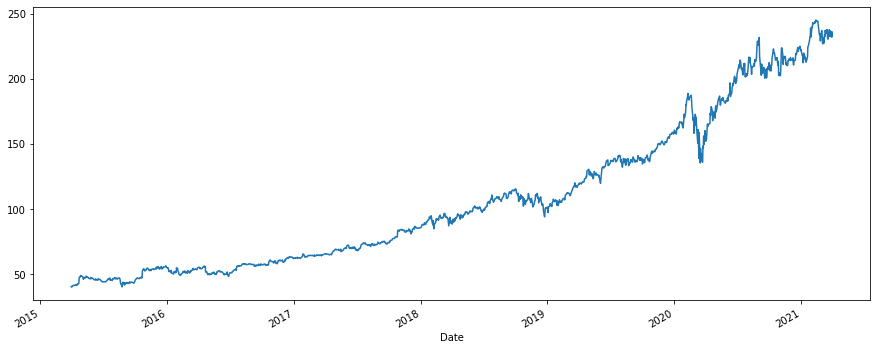

In [ ]:
df = pd.read_csv(r'/content/Microsoft_Stock.csv', header=0, index_col=0, parse_dates=True)
df['Close'].plot(figsize=(15,6))
pyplot.show()

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438


In [ ]:
df.shape

(1511, 5)

## Augmented Dickey Fuller Test func

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='aic') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    # The t-value measures the size of the difference relative to the variation in your sample data. 
    # T is simply the calculated difference represented in units of standard error. 
    # The greater the magnitude of T, the greater the evidence against the null hypothesis.
    
    dfoutput = pd.Series(dftest[0:5], index=['Test Statistic',
                                             'p-value','No Lags Used',
                                             'Number of Observations Used',
                                             'Critical values'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value 
       # Critical values for the ADF test for 1%, 5%, and 10% significance levels 
       #  with the constant model are −3.43, −2.87, and −2.57, respectively.
    print(dfoutput)

    p_value = dftest[1]
    if p_value <= 0.05 :
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")
        

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close'] , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                          1.737136
p-value                                                                 0.998216
No Lags Used                                                                  24
Number of Observations Used                                                 1486
Critical values                {'1%': -3.4347582315402434, '5%': -2.863486949...
Critical Value (1%)                                                    -3.434758
Critical Value (5%)                                                    -2.863487
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


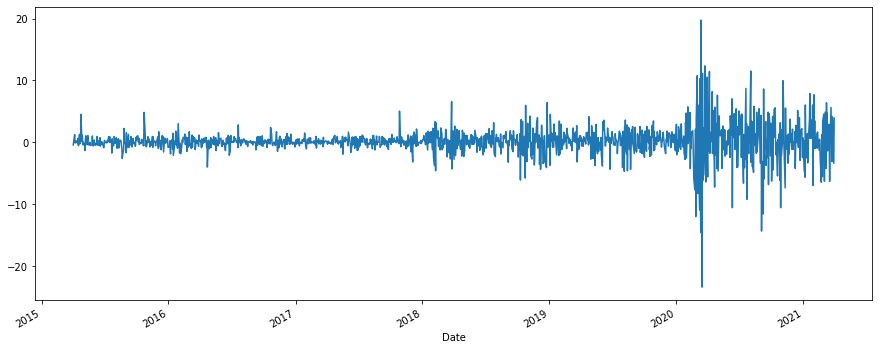

In [ ]:
close = df['Close'].diff().dropna()
close.plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(close , 'Close')

Results of Dickey-Fuller Test for column: Close
Test Statistic                                                        -10.038331
p-value                                                                      0.0
No Lags Used                                                                  24
Number of Observations Used                                                 1485
Critical values                {'1%': -3.43476120520139, '5%': -2.86348826217...
Critical Value (1%)                                                    -3.434761
Critical Value (5%)                                                    -2.863488
Critical Value (10%)                                                   -2.567807
dtype: object
Conclusion:====>
Reject the null hypothesis
Data is stationary


**Stationarity is removed by applying 1st differencing.**

In [ ]:
df2 = df.copy()
df2['Close'] = df['Close'].diff()
df2.dropna(inplace=True)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


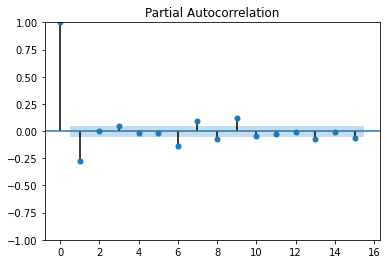

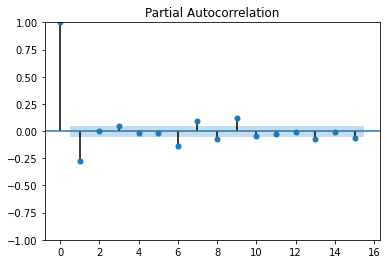

In [ ]:
plot_pacf(df2['Close'], lags = 15)

PACF: 3
ACF: 

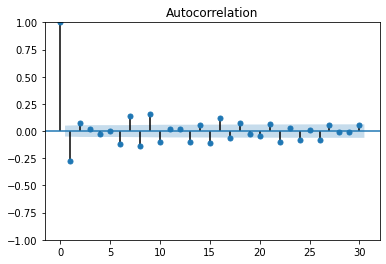

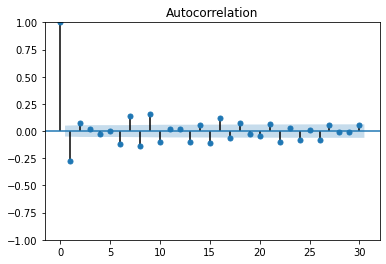

In [ ]:
plot_acf(df2['Close'], lags = 30)

In [ ]:
from pmdarima import auto_arima

## ARIMA

### Applying Auto ARIMA on stationary dataset

In [ ]:
arima = auto_arima(df['Close'], trace=True, suppress_warnings=True)
arima.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6761.238, Time=2.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6876.786, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6760.385, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6770.738, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6879.320, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6762.379, Time=0.42 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6762.380, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6764.095, Time=0.98 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=6766.263, Time=0.12 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 5.800 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1511
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -3377.192
Date:                Fri, 04 Nov 2022   AIC                           6760.385
Time:                        05:06:55   BIC                           6776.344
Sample:                             0   HQIC                          6766.328
                               - 1511                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1641      0.059      2.788      0.005       0.049       0.280
ar.L1         -0.2748      0.010    -28.723      0.000      -0.294      -0.256
sigma2         5.1303      0.074     69.006      0.000       4.985       5.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              9082.00
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              20.43   Skew:                            -0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Train Test Split

In [ ]:
split = 200

In [ ]:
train = df.iloc[:-split]
train

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01,40.60,40.76,40.31,40.72,36865322
2015-04-02,40.66,40.74,40.12,40.29,37487476
2015-04-06,40.34,41.78,40.18,41.55,39223692
2015-04-07,41.61,41.91,41.31,41.53,28809375
2015-04-08,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2020-06-09,188.00,190.70,187.26,189.80,29783916
2020-06-10,191.13,198.52,191.01,196.84,43872329
2020-06-11,193.13,195.76,186.07,186.27,52854672


In [ ]:
test = df.iloc[-split:]
test

,Open,High,Low,Close,Volume
Date,,,,,
2020-06-16,192.89,195.58,191.46,193.57,42556656
2020-06-17,195.03,196.32,193.69,194.24,25687822
2020-06-18,194.00,196.49,194.00,196.32,23061648
2020-06-19,198.59,199.29,194.37,195.15,44441141
2020-06-22,195.79,200.76,195.23,200.57,32818929
...,...,...,...,...,...
2021-03-25,235.30,236.94,231.57,232.34,34061853
2021-03-26,231.55,236.71,231.55,236.48,25479853
2021-03-29,236.59,236.80,231.88,235.24,25227455


In [ ]:
print(f"Shape:\n> df: {df.shape}\n> train: {train.shape}\n> test: {test.shape}")

Shape:
> df: (1511, 5)
> train: (1311, 5)
> test: (200, 5)


### Fitting the ARIMA(1,1,0) Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Close'], order=(1,0,0))
arima = model.fit()
arima.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1311
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2789.295
Date:                Fri, 04 Nov 2022   AIC                           5584.589
Time:                        05:21:57   BIC                           5600.125
Sample:                             0   HQIC                          5590.416
                               - 1311                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.1654    106.444      0.856      0.392    -117.461     299.792
ar.L1          0.9995      0.001    742.962      0.000       0.997       1.002
sigma2         4.1044      0.041     98.930      0.000       4.023       4.186
===================================================================================
Ljung-Box (L1) (Q):                 158.42   Jarque-Bera (JB):             46795.40
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              16.51   Skew:                            -0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Prediction

In [ ]:
results = arima.predict(start = 0, end = len(df)-1, typ='levels')
print(results[:5])

0    91.165442
1    40.743825
2    40.314028
3    41.573433
4    41.553442
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
results.index = df.index

In [ ]:
pred = pd.DataFrame({'Close':np.array(df['Close']),'Close_pred':results})
pred

,Close,Close_pred
Date,,
2015-04-01,40.72,91.165442
2015-04-02,40.29,40.743825
2015-04-06,41.55,40.314028
2015-04-07,41.53,41.573433
2015-04-08,41.42,41.553442
...,...,...
2021-03-25,232.34,180.293556
2021-03-26,236.48,180.251463
2021-03-29,235.24,180.209389


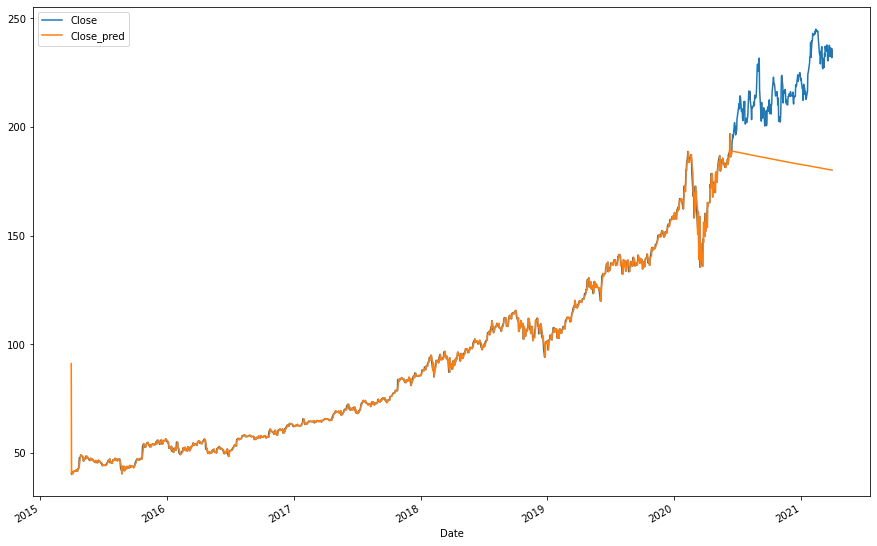

In [ ]:
pyplot.figure(figsize=(15,10))
pred['Close'].plot(legend=True)
pred['Close_pred'].plot(legend=True)

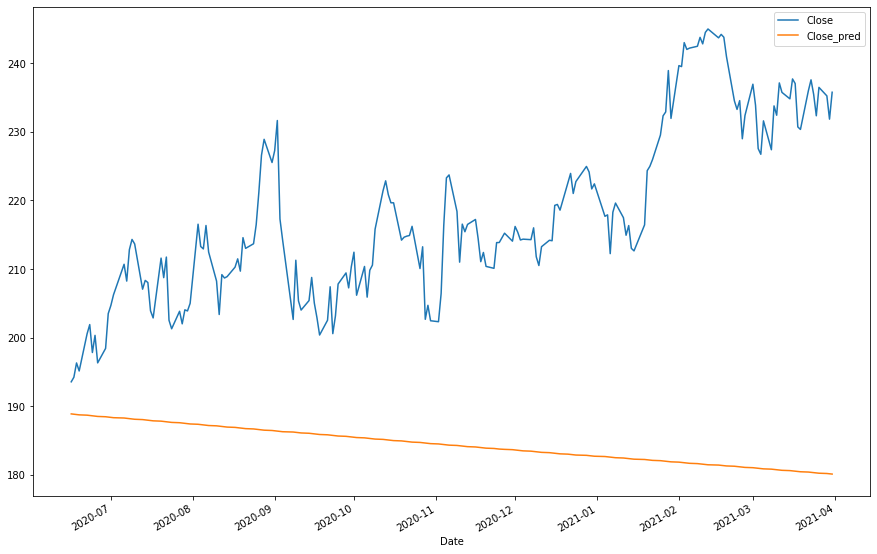

In [ ]:
pyplot.figure(figsize=(15,10))
pred['Close'][-split:].plot(legend=True)
pred['Close_pred'][-split:].plot(legend=True)

# **Because of volatility in the stock dataset ARIMA model cannot be used to forcast the future values.**